In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/delhiclimate/DailyDelhiClimateTrain.csv
/kaggle/input/delhiclimate/DailyDelhiClimateTest.csv


In [2]:
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

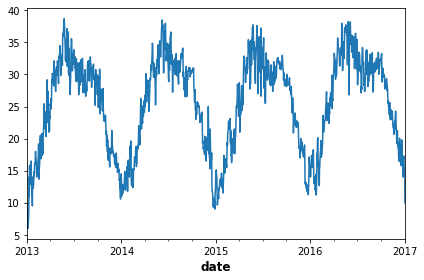

In [3]:
import pandas as pd
import tensorflow as tf

# Load the time series as a Pandas dataframe
data = pd.read_csv(
    '../input/delhiclimate/DailyDelhiClimateTrain.csv',
    parse_dates=['date'],
    index_col='date',
)

data['meantemp'].plot();

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

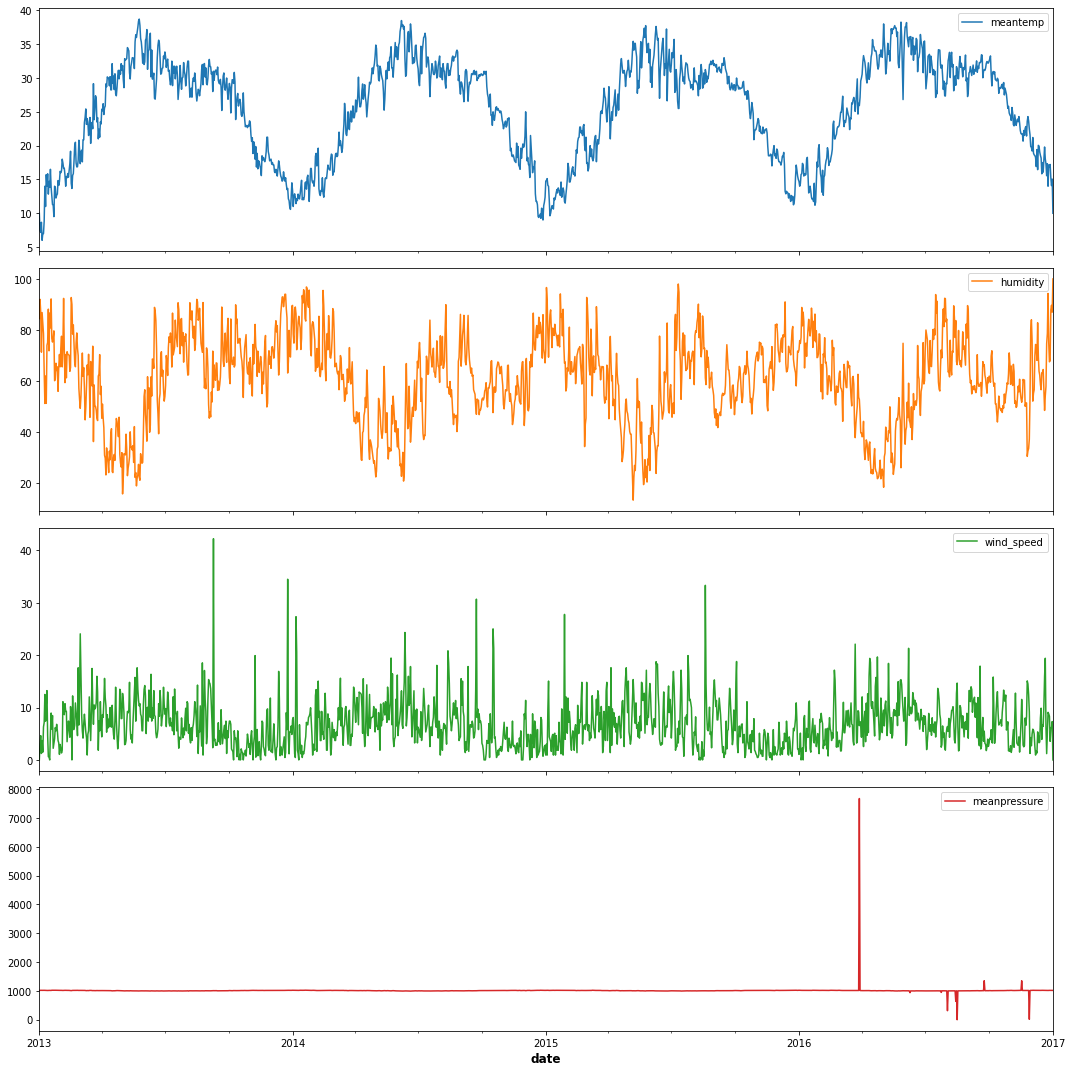

In [4]:
data.plot(figsize=(15,15), subplots = True)

In [5]:
data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [6]:
#meantemp
Ytrain = pd.DataFrame(data.loc[:, 'meantemp']) 
display(Ytrain)

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [7]:
#What about the kernels? 
#We can represent kernels as small arrays. Kernels define how a convolutional layer is 
#connected to the layer that follows.
#The activations in the network we call feature maps. They are what result when we apply a filter 
#to an image; they contain the visual features the kernel extracts.
#Images are two-dimensional and so our kernels were 2D arrays.
#A time-series is one-dimensional, so what should the kernel be? A 1D array! Here are some 
#kernels sometimes used on time-series data.

detrend = tf.constant([-1, 1], dtype=tf.float32)

average = tf.constant([0.2, 0.2, 0.2, 0.2, 0.2], dtype=tf.float32)

spencer = tf.constant([-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 32, 3, -5, -6, -3], dtype=tf.float32) / 320

#Convolution on a sequence works just like convolution on an image. The difference is just that a sliding
#window on a sequence only has one direction to travel -- left to right -- instead of the two directions
#on an image. And just like before, the features picked out depend on the pattern on numbers in the kernel.

2022-12-12 14:18:36.331739: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


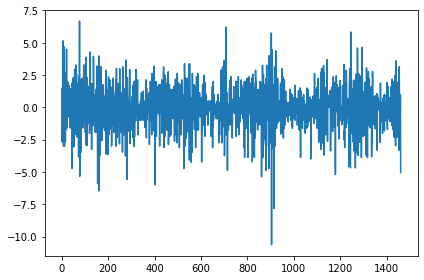

In [8]:
# UNCOMMENT ONE
kernel = detrend
#kernel = average
#kernel = spencer

# Reformat for TensorFlow
ts_data = Ytrain.to_numpy()
ts_data = tf.expand_dims(ts_data, axis=0)
ts_data = tf.cast(ts_data, dtype=tf.float32)
kern = tf.reshape(kernel, shape=(*kernel.shape, 1, 1))

ts_filter = tf.nn.conv1d(
    input=ts_data,
    filters=kern,
    stride=1,
    padding='VALID',
)

# Format as Pandas Series
data_filtered = pd.Series(tf.squeeze(ts_filter).numpy())

data_filtered.plot();

In [9]:
data_filtered.head

<bound method NDFrame.head of 0      -2.600000
1      -0.233334
2       1.500000
3      -2.666667
4       1.000000
          ...   
1456    0.367392
1457   -1.979297
1458   -1.142858
1459    0.957394
1460   -5.052631
Length: 1461, dtype: float32>

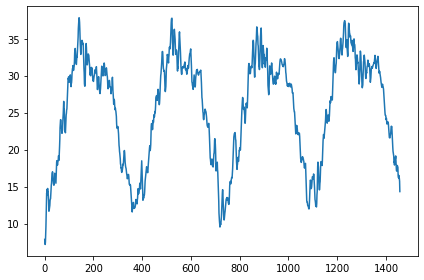

In [10]:
# UNCOMMENT ONE
#kernel = detrend
kernel = average
#kernel = spencer

ts_data = Ytrain.to_numpy()
ts_data = tf.expand_dims(ts_data, axis=0)
ts_data = tf.cast(ts_data, dtype=tf.float32)
kern = tf.reshape(kernel, shape=(*kernel.shape, 1, 1))

ts_filter = tf.nn.conv1d(
    input=ts_data,
    filters=kern,
    stride=1,
    padding='VALID',
)

# Format as Pandas Series
data_filtered = pd.Series(tf.squeeze(ts_filter).numpy())

data_filtered.plot();

In [11]:
data_filtered.head

<bound method NDFrame.head of 0        7.846666
1        7.246666
2        7.166667
3        7.504762
4        8.571428
          ...    
1453    16.505686
1454    16.089668
1455    16.108717
1456    15.690672
1457    14.320672
Length: 1458, dtype: float32>

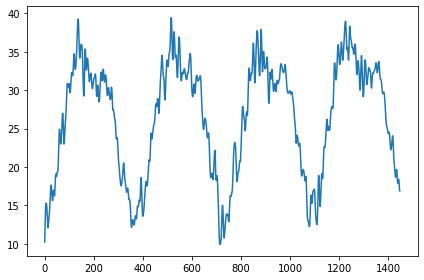

In [12]:
# UNCOMMENT ONE
#kernel = detrend
#kernel = average
kernel = spencer

ts_data = Ytrain.to_numpy()
ts_data = tf.expand_dims(ts_data, axis=0)
ts_data = tf.cast(ts_data, dtype=tf.float32)
kern = tf.reshape(kernel, shape=(*kernel.shape, 1, 1))

ts_filter = tf.nn.conv1d(
    input=ts_data,
    filters=kern,
    stride=1,
    padding='VALID',
)

# Format as Pandas Series
data_filtered = pd.Series(tf.squeeze(ts_filter).numpy())

data_filtered.plot();

In [13]:
data_filtered.head

<bound method NDFrame.head of 0       10.239821
1       11.779063
2       13.312127
3       14.266666
4       14.940475
          ...    
1443    18.316572
1444    17.781841
1445    17.372612
1446    16.969393
1447    16.887268
Length: 1448, dtype: float32>

In [14]:
#In fact, the detrend kernel filters for changes in the series, while average and spencer
#are both "smoothers" that filter for low-frequency components in the series.

#If you were interested in predicting the future popularity of search terms, you might
#train a convnet on time-series like this one. It would try to learn what features in those
#series are most informative for the prediction.

#Though convnets are not often the best choice on their own for these kinds of problems,
#they are often incorporated into other models for their feature extraction capabilities.